In [ ]:
# !pip install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 867.7 kB/s eta 0:00:001m976.5 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 2.6 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 5.2 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.3 MB/s eta 0:00:007.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.6/362.6 kB 6.3 MB/s eta 0:00:007.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 6.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.1 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 6.4 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.8/122.8 kB 9.5 MB/s eta 0:00:00


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use("default")
sns.set()

In [3]:
df = pd.read_csv("../data/pokemon_stats_2025.csv")
df.head()


,pokedex_id,name,height,weight,base_experience,type_1,type_2,hp,attack,defense,special_attack,special_defense,speed
0,1,Bulbasaur,7,69,64,grass,poison,45,49,49,65,65,45
1,2,Ivysaur,10,130,142,grass,poison,60,62,63,80,80,60
2,3,Venusaur,20,1000,236,grass,poison,80,82,83,100,100,80
3,4,Charmander,6,85,62,fire,NaN,39,52,43,60,50,65
4,5,Charmeleon,11,190,142,fire,NaN,58,64,58,80,65,80


In [6]:
df.shape

(250, 13)

In [11]:
df.columns 

Index(['pokedex_id', 'name', 'height', 'weight', 'base_experience', 'type_1',
       'type_2', 'hp', 'attack', 'defense', 'special_attack',
       'special_defense', 'speed'],
      dtype='str')

In [14]:
df.info()

df.describe

<class 'pandas.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   pokedex_id       250 non-null    int64
 1   name             250 non-null    str  
 2   height           250 non-null    int64
 3   weight           250 non-null    int64
 4   base_experience  250 non-null    int64
 5   type_1           250 non-null    str  
 6   type_2           115 non-null    str  
 7   hp               250 non-null    int64
 8   attack           250 non-null    int64
 9   defense          250 non-null    int64
 10  special_attack   250 non-null    int64
 11  special_defense  250 non-null    int64
 12  speed            250 non-null    int64
dtypes: int64(10), str(3)
memory usage: 25.5 KB


<bound method NDFrame.describe of      pokedex_id        name  height  weight  base_experience   type_1  type_2  \
0             1   Bulbasaur       7      69               64    grass  poison   
1             2     Ivysaur      10     130              142    grass  poison   
2             3    Venusaur      20    1000              236    grass  poison   
3             4  Charmander       6      85               62     fire     NaN   
4             5  Charmeleon      11     190              142     fire     NaN   
..          ...         ...     ...     ...              ...      ...     ...   
245         246    Larvitar       6     720               60     rock  ground   
246         247     Pupitar      12    1520              144     rock  ground   
247         248   Tyranitar      20    2020              270     rock    dark   
248         249       Lugia      52    2160              306  psychic  flying   
249         250       Ho-oh      38    1990              306     fire  flyi

In [16]:
df.isnull().sum()

pokedex_id           0
name                 0
height               0
weight               0
base_experience      0
type_1               0
type_2             135
hp                   0
attack               0
defense              0
special_attack       0
special_defense      0
speed                0
dtype: int64

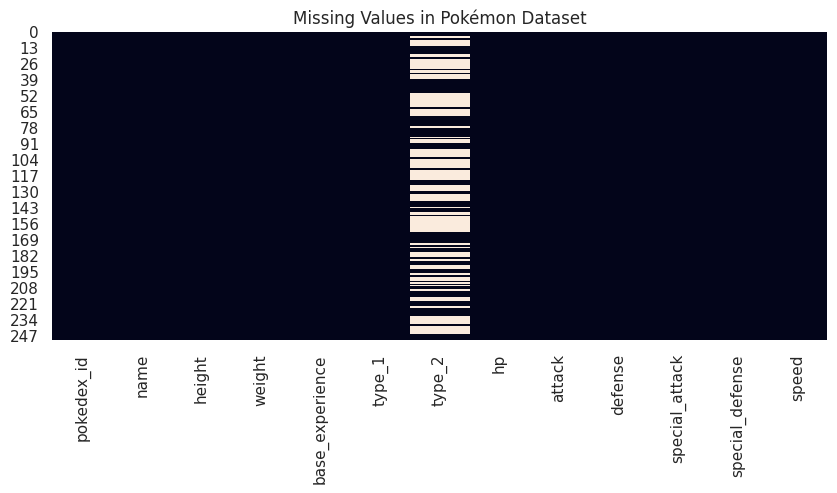

In [17]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values in Pokémon Dataset")
plt.show()


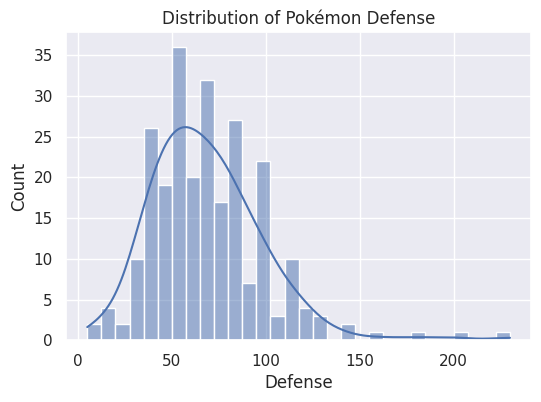

In [21]:
# Univariate Analysis (Single Column)

# 🔹 Distribution of HP

plt.figure(figsize=(6,4))
sns.histplot(df['defense'],bins=30, kde = True)
plt.title("Distribution of Pokémon Defense")
plt.xlabel("Defense")
plt.ylabel("Count")
plt.show()

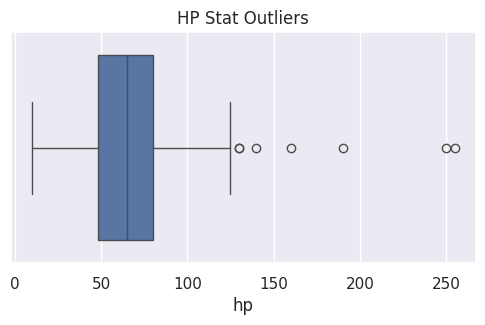

In [24]:
# 🔹 Boxplot for Attack (Outliers)
plt.figure(figsize=(6,3))
sns.boxplot(x=df['hp'])
plt.title("HP Stat Outliers")
plt.show()

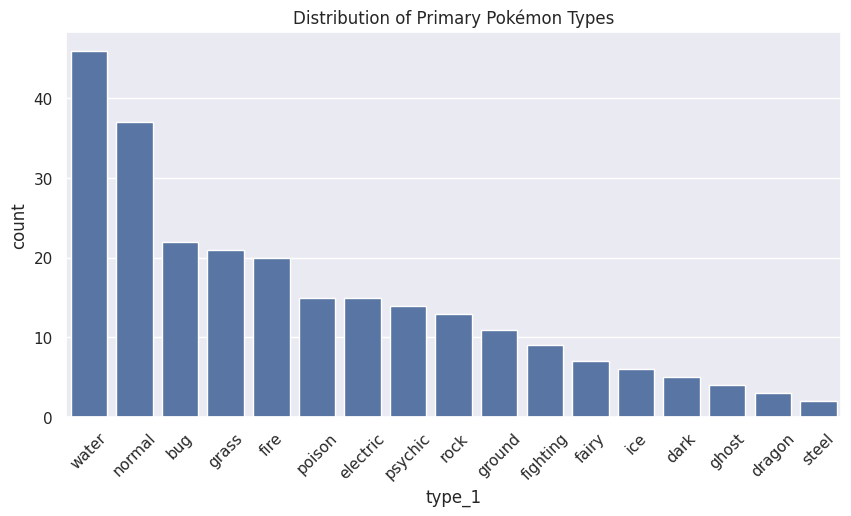

In [28]:
# Categorical Analysis (Types)

# 🔹 Primary Pokémon Type Distribution

plt.figure(figsize=(10,5))
sns.countplot(x='type_1', data=df, order=df['type_1'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Primary Pokémon Types")
plt.show()

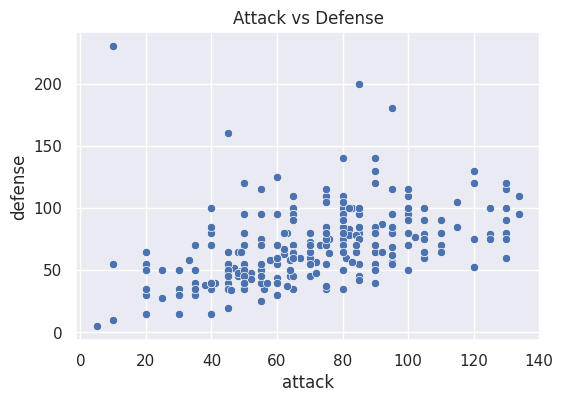

In [29]:
# Bivariate Analysis
# 🔹 Attack vs Defense
plt.figure(figsize=(6,4))
sns.scatterplot(x='attack', y='defense', data=df)
plt.title("Attack vs Defense")
plt.show()

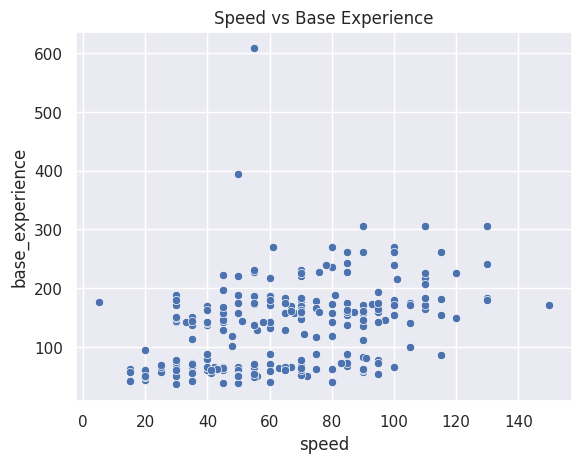

In [30]:
# 🔹 Speed vs Base Experience
sns.scatterplot(x='speed', y='base_experience', data=df)
plt.title("Speed vs Base Experience")
plt.show()

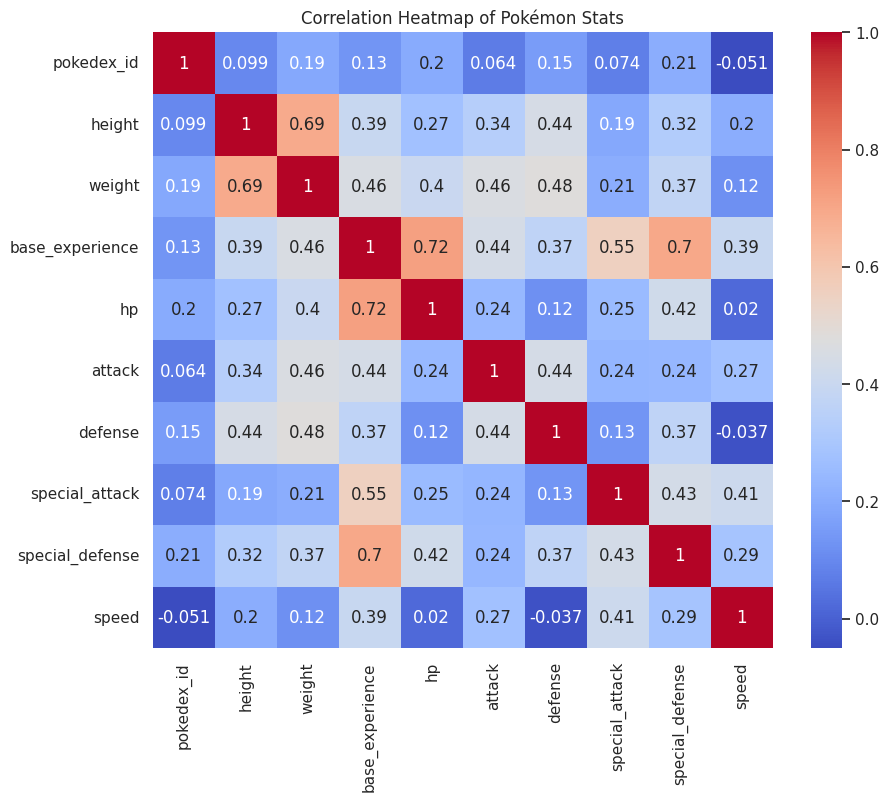

In [33]:
# Correlation Analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Pokémon Stats")
plt.show()